# Experiment 213 Kreisel - Auswertung
##### Felix Fleischle - 25.10.2021

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Zuerst definieren wir eine Funktion, die uns den Bruch vom Fehler eines Wertes durch den Wert selbst zurückgibt,
# welche wir für die Berechnung des relativen Fehlers brauchen werden
def errorFrac(x, x_err, p):
    return (x_err * p)/x

## 1) Diskussion der Beobachtungen des Vorversuches

Zuerst haben wir den kräftefreien Kreisel in der senkrechten Lage beschleunigt und am Kugellager ein Drehmoment auf den Kreisel wirken. Wir haben beobachtet, dass der Kreisel sich "am Finger hochzieht", also dem Drehmoment seitlich "ausweicht", was wir auch schon beim einem Drehmoment wie bei der Gewichtskraft erwartet haben (siehe Einleitung).<br>
Als nächstes haben wir dem Kreisel einen Stoß verpasst, sodass sich eine Nutationsbewegung eingestellt hat. Auf der Farbscheibe hat sich dabei tatsächlich ein Punkt gezeigt mit unvermischter Farbe. Dieser ist der erwartete Punkt, bei dem die momentante Drehachse die Farbscheibe durchstößt.<br>
Insgesamt war der Vorversuch gut um die Rotationsbewegungen des Kreisels zu verstehen, und alle unserer Beobachtungen entsprechen den Erwartungen.

## 2) Dämpfung des Kreisels

In [3]:
# Wir schreiben unsere gemessenen Daten in Arrays:

t_daempfung = np.array([0 , 2 , 4 , 6 , 8 , 10 , 12])*60 # Sekunden
omega_daempfung = 2 * np.pi * np.array([560 , 510 , 460 , 430 , 390 , 350 , 320]) / 60 # Hertz
omega_daempfung_err = 2 * np.pi * np.ones(7) * 10 / 60

print("Zeitwerte [s]: " , t_daempfung)
print("Kreisfrequenzen [1/s]: " , omega_daempfung)
print("Fehler Kreisfrequenzen [1/s]: " , omega_daempfung_err)

Zeitwerte [s]:  [  0 120 240 360 480 600 720]
Kreisfrequenzen [1/s]:  [58.64306287 53.40707511 48.17108736 45.0294947  40.8407045  36.65191429
 33.51032164]
Fehler Kreisfrequenzen [1/s]:  [1.04719755 1.04719755 1.04719755 1.04719755 1.04719755 1.04719755
 1.04719755]


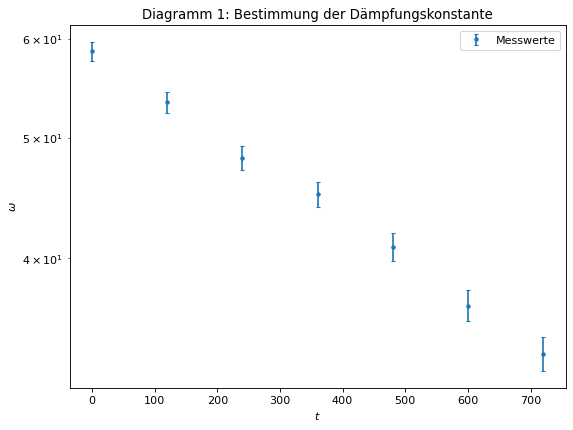

In [4]:
# Wir plotten unsere Messwerte:
plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(t_daempfung, omega_daempfung, linestyle="None", marker = ".", yerr = omega_daempfung_err, capsize = 2, label="Messwerte")
plt.title("Diagramm 1: Bestimmung der Dämpfungskonstante")
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$\omega$")
plt.yscale("log")

In [5]:
# Nun definieren wir eine Dämpfungsfunktion um den fit durchzuführen
def daempfung(t_daempfung, delta, A):
    return A * np.exp((- delta) * t_daempfung)
values_0 = [0, 58.64306287]

# Wir führen den fit durch
popt, pcov = curve_fit(daempfung, t_daempfung, omega_daempfung,sigma = omega_daempfung_err,  p0 = values_0)

delta = popt[0]
A = popt[1]
delta_err = pcov[0,0]
A_err = pcov[1,1]

print("Delta: ",delta, "1/s")
print("Fehler von Delta: ",delta_err, "1/s")
print("A: ", A, "1/s")
print("Fehler von A: ", A_err, "1/s")

Delta:  0.0007698051599880399 1/s
Fehler von Delta:  2.2737270927282008e-10 1/s
A:  58.60299643142167 1/s
Fehler von A:  0.09989577894309454 1/s


Text(0, 0.5, '$\\omega$')

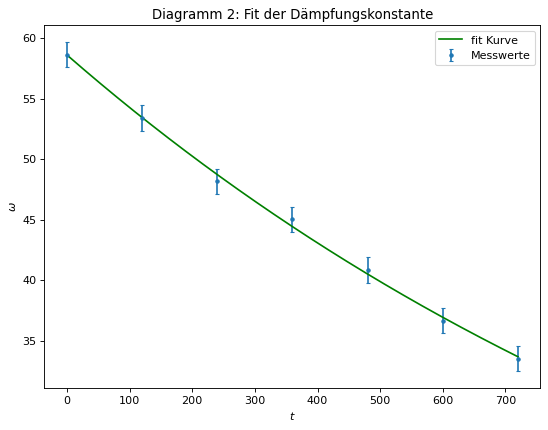

In [6]:
# Wir fügen den fit in den Plot ein
t_daempfung_res = np.linspace(0,720, 5000)

plt.figure(figsize=(8, 6), dpi=80)
plt.errorbar(t_daempfung, omega_daempfung, linestyle="None", marker = ".", yerr = omega_daempfung_err, capsize = 2, label="Messwerte")
plt.plot(t_daempfung_res, daempfung(t_daempfung_res, delta, A), color="green", label="fit Kurve")
plt.title("Diagramm 2: Fit der Dämpfungskonstante")
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$\omega$")

In [7]:
# Nun können wir die Halbwertszeit bestimmen
t_halb = np.log(2)/delta
t_halb_err = np.log(2) * delta_err / (delta**2)

print("Halbwertszeit: ", t_halb, "s")
print("Fehler der Halbwertszeit: ", t_halb_err, "s")

Halbwertszeit:  900.4189846827143 s
Fehler der Halbwertszeit:  0.00026595132725684955 s


Ergebnisse:<br>
$\delta = 0.00076980516 \pm 0.00000000023 \frac{1}{s} $ <br>
$t_{1/2}=900.41898 \pm 0.00027 s$

## 3a) Präzessionsdauer in Abhängigkeit des Winkels

Unsere Messergebnisse waren:

In [8]:
winkel = np.array([20, 40, 90])*(np.pi/180) # Winkel in Radiant
winkel_err = np.ones(3) * 5 *(np.pi/180)# Fehler des Winkels

t_p_winkel = np.array([125.42, 124.58, 127.98]) # Präzessionsdauer in Sekunden
t_p_winkel_err = np.ones(3)*5

print("Winkel: ", winkel, "rad")
print("Fehler des Winkels: ", winkel_err, "rad")
print("Präzessionsdauer: ", t_p_winkel, "s")
print("Fehler der Präzessionsdauer: ", t_p_winkel_err, "s")

Winkel:  [0.34906585 0.6981317  1.57079633] rad
Fehler des Winkels:  [0.08726646 0.08726646 0.08726646] rad
Präzessionsdauer:  [125.42 124.58 127.98] s
Fehler der Präzessionsdauer:  [5. 5. 5.] s


Wie wir sehen sind die Präzessionsdauern innerhalb der Fehlergrenzen gleich. Die Präzessionsdauer hängt also nicht von der räumlichen Ausrichtung des Kreisels ab, was wir auch schon in der Einleitung gesehen haben.

## 3b) Bestimmung des Trägheitmoments $I_z$ aus der Präzessionsdauer

In [9]:
# Wir tragen unsere Messdaten für jedes Drehmoment in Arrays ein:

# 1 Masse bei 15cm Abstand
t_p_1m15cm = np.array([250.20 , 219.96 , 158.75 , 143.45])
omega_1m15cm = 2*np.pi*(1/60)*np.array([700, 560, 470, 410]) / 2

# 1 Masse bei 20cm Abstand
t_p_1m20cm = np.array([201.46 , 145.29 , 132.89 , 122.72])
omega_1m20cm = 2*np.pi*(1/60)*np.array([700, 600, 530, 460]) / 2

# 2 Massen bei 15cm Abstand
t_p_2m15cm = np.array([118.92 , 111.24 , 103.82 , 58.32])
omega_2m15cm = 2*np.pi*(1/60)*np.array([350, 315, 280, 255])

# 2 Massen in 20cm Abstand
t_p_2m20cm = np.array([124.02 , 148.20 , 131.73 , 117.48])
omega_2m20cm = 2*np.pi*(1/60)*np.array([430, 350, 300, 250])

# Fehler von t_p
t_p_err = 3
t_p_err_array = np.ones(4)*3
#Fehler von omega
omega_err = 2*np.pi*(1/60)*5

print("Kreisfrequenzen; 1 Masse 15cm Abstand: ", omega_1m15cm, "[1/s]")
print("Kreisfrequenzen; 1 Masse 20cm Abstand: ", omega_1m20cm, "[1/s]")
print("Kreisfrequenzen; 2 Massen 15cm Abstand: ", omega_2m15cm, "[1/s]")
print("Kreisfrequenzen; 2 Massen 20cm Abstand: ", omega_2m20cm, "[1/s]")

Kreisfrequenzen; 1 Masse 15cm Abstand:  [36.65191429 29.32153143 24.60914245 21.4675498 ] [1/s]
Kreisfrequenzen; 1 Masse 20cm Abstand:  [36.65191429 31.41592654 27.75073511 24.08554368] [1/s]
Kreisfrequenzen; 2 Massen 15cm Abstand:  [36.65191429 32.98672286 29.32153143 26.70353756] [1/s]
Kreisfrequenzen; 2 Massen 20cm Abstand:  [45.0294947  36.65191429 31.41592654 26.17993878] [1/s]


Wir bestimmen zuerst den Endwert der Frequenz nach jeder Messung mithilfe der Dämpfungskonstante

In [10]:
def omegamean(omega, delta, t_p):
    return (omega/2)*(1+np.exp(-delta * t_p))

def omegameanerr(omega_err, omega, delta, t_p, delta_err, t_p_err):
    return np.sqrt( (omega_err / 2)**2 + ( (omega / 2) * np.exp(-delta*t_p)*t_p*delta_err )**2 + ( (omega / 2)*np.exp(-delta*t_p)*delta*t_p_err )**2)

omega_1m15cm_mean = omegamean(omega_1m15cm , delta , t_p_1m15cm)
omega_1m20cm_mean = omegamean(omega_1m20cm , delta , t_p_1m20cm)
omega_2m15cm_mean = omegamean(omega_2m15cm , delta , t_p_2m15cm)
omega_2m20cm_mean = omegamean(omega_2m20cm , delta , t_p_2m20cm)


omega_1m15cm_mean_err = omegameanerr(omega_err , omega_1m15cm , delta , t_p_1m15cm , delta_err , t_p_err)
omega_1m20cm_mean_err = omegameanerr(omega_err , omega_1m20cm , delta , t_p_1m20cm , delta_err , t_p_err)
omega_2m15cm_mean_err = omegameanerr(omega_err , omega_2m15cm , delta , t_p_2m15cm , delta_err , t_p_err)
omega_2m20cm_mean_err = omegameanerr(omega_err , omega_2m20cm , delta , t_p_2m20cm , delta_err , t_p_err)

print("Durchschnittskreisfrequenzen 1 Masse 15cm Abstand: ", omega_1m15cm_mean, "[1/s]")
print("Durchschnittskreisfrequenzen 1 Masse 20cm Abstand: ", omega_1m20cm_mean, "[1/s]")
print("Durchschnittskreisfrequenzen 2 Massen 15cm Abstand: ", omega_2m15cm_mean, "[1/s]")
print("Durchschnittskreisfrequenzen 2 Massen 20cm Abstand: ", omega_2m20cm_mean, "[1/s]")

Durchschnittskreisfrequenzen 1 Masse 15cm Abstand:  [33.44134408 27.03787305 23.19369278 20.34533694] [1/s]
Durchschnittskreisfrequenzen 1 Masse 20cm Abstand:  [34.01925182 29.75375467 26.40148352 22.99994301] [1/s]
Durchschnittskreisfrequenzen 2 Massen 15cm Abstand:  [35.04876034 31.6331281  28.19542507 26.11736595] [1/s]
Durchschnittskreisfrequenzen 2 Massen 20cm Abstand:  [42.97940326 34.67604635 29.90114039 25.04807726] [1/s]


Jetzt können wir $T_P$ gegen $\bar{\omega}$ auftragen und die Steigung bestimmen. <br>
Wir tun dies zuerst für 1 Masse bei 15cm Abstand:

Text(0, 0.5, '$T_P$')

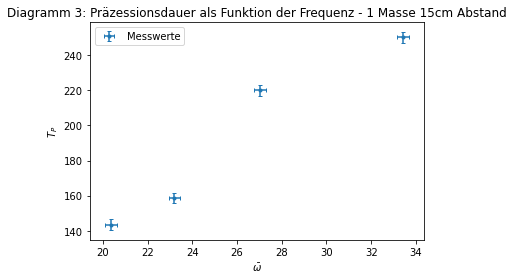

In [11]:
plt.errorbar(omega_1m15cm_mean,t_p_1m15cm ,linestyle="None", marker = ".", yerr = t_p_err_array, xerr = omega_1m15cm_mean_err,  capsize = 2, label="Messwerte")
plt.legend()
plt.title("Diagramm 3: Präzessionsdauer als Funktion der Frequenz - 1 Masse 15cm Abstand")
plt.xlabel("$\\bar{\\omega}$")
plt.ylabel("$T_P$")

Steigung s, bei 1 Masse 15cm:  [7.46624211] [s^2]
Fehler von s:  [0.26872371] [s^2]


Text(0, 0.5, '$T_P$')

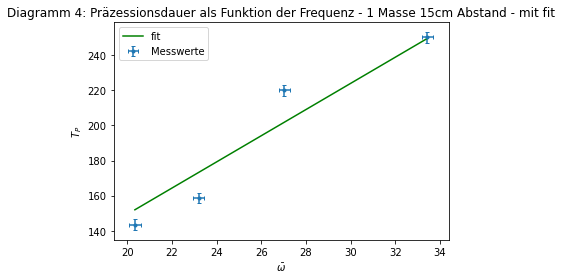

In [12]:
def linear(omega, s):
    return s*omega
def curvefitOmega(omega, t_p):
    return curve_fit(linear, omega, t_p, sigma = t_p_err_array)

popt115, pcov115 = curvefitOmega(omega_1m15cm_mean, t_p_1m15cm)

s_115 = popt115
s_115_err = np.sqrt(pcov115[0])

print("Steigung s, bei 1 Masse 15cm: ", s_115, "[s^2]")
print("Fehler von s: ", s_115_err, "[s^2]")

plt.errorbar(omega_1m15cm_mean,t_p_1m15cm ,linestyle="None", marker = ".", yerr = t_p_err_array, xerr = omega_1m15cm_mean_err,  capsize = 2, label="Messwerte")
plt.plot(omega_1m15cm_mean, linear(omega_1m15cm_mean, s_115), color="green", label = "fit")
plt.legend()
plt.title("Diagramm 4: Präzessionsdauer als Funktion der Frequenz - 1 Masse 15cm Abstand - mit fit")
plt.xlabel("$\\bar{\\omega}$")
plt.ylabel("$T_P$")

Für 1 Masse bei 20cm:

Text(0, 0.5, '$T_P$')

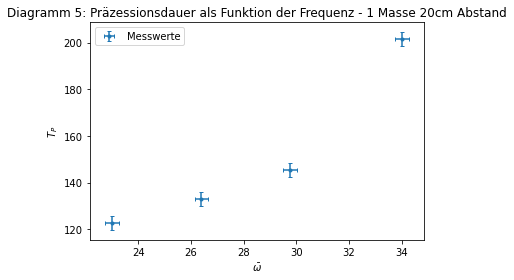

In [13]:
plt.errorbar(omega_1m20cm_mean,t_p_1m20cm ,linestyle="None", marker = ".", yerr = t_p_err_array, xerr = omega_1m20cm_mean_err,  capsize = 2, label="Messwerte")
plt.legend()
plt.title("Diagramm 5: Präzessionsdauer als Funktion der Frequenz - 1 Masse 20cm Abstand")
plt.xlabel("$\\bar{\\omega}$")
plt.ylabel("$T_P$")

Steigung s, bei 1 Masse 20cm:  [5.35621396] [s^2]
Fehler von s:  [0.25575639] [s^2]


Text(0, 0.5, '$T_P$')

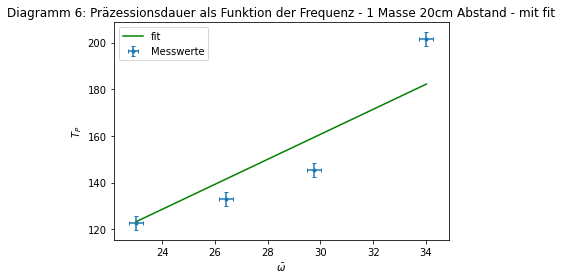

In [14]:
popt120, pcov120 = curvefitOmega(omega_1m20cm_mean, t_p_1m20cm)

s_120 = popt120
s_120_err = np.sqrt(pcov120[0])

print("Steigung s, bei 1 Masse 20cm: ", s_120, "[s^2]")
print("Fehler von s: ", s_120_err, "[s^2]")

plt.errorbar(omega_1m20cm_mean,t_p_1m20cm ,linestyle="None", marker = ".", yerr = t_p_err_array, xerr = omega_1m20cm_mean_err,  capsize = 2, label="Messwerte")
plt.plot(omega_1m20cm_mean, linear(omega_1m20cm_mean, s_120), color="green", label = "fit")
plt.legend()
plt.title("Diagramm 6: Präzessionsdauer als Funktion der Frequenz - 1 Masse 20cm Abstand - mit fit")
plt.xlabel("$\\bar{\\omega}$")
plt.ylabel("$T_P$")

Nun für 2 Massen bei 15cm:

Steigung s, bei 2 Massen 15cm:  [3.27488598] [s^2]
Fehler von s:  [0.29198414] [s^2]


Text(0, 0.5, '$T_P$')

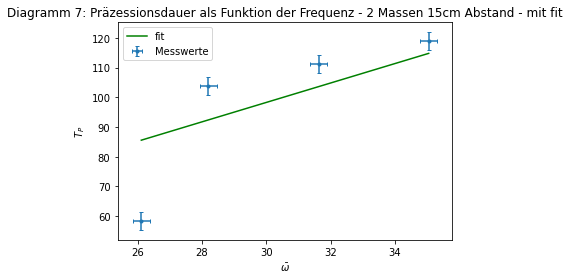

In [15]:
popt215, pcov215 = curvefitOmega(omega_2m15cm_mean, t_p_2m15cm)

s_215 = popt215
s_215_err = np.sqrt(pcov215[0])

print("Steigung s, bei 2 Massen 15cm: ", s_215, "[s^2]")
print("Fehler von s: ", s_215_err, "[s^2]")

plt.errorbar(omega_2m15cm_mean,t_p_2m15cm ,linestyle="None", marker = ".", yerr = t_p_err_array, xerr = omega_2m15cm_mean_err,  capsize = 2, label="Messwerte")
plt.plot(omega_2m15cm_mean, linear(omega_2m15cm_mean, s_215), color="green", label = "fit")
plt.legend()
plt.title("Diagramm 7: Präzessionsdauer als Funktion der Frequenz - 2 Massen 15cm Abstand - mit fit")
plt.xlabel("$\\bar{\\omega}$")
plt.ylabel("$T_P$")

Und für 2 Massen bei 20cm Abstand:

Steigung s, bei 2 Massen 20cm:  [3.79573031] [s^2]
Fehler von s:  [0.43872097] [s^2]


Text(0, 0.5, '$T_P$')

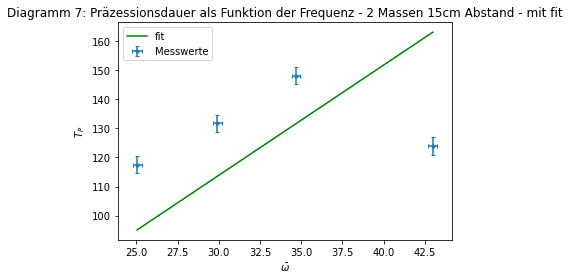

In [16]:
index = [0]
popt220, pcov220 = curve_fit(linear, omega_2m20cm_mean, t_p_2m20cm, sigma = t_p_err_array)

s_220 = popt220
s_220_err = np.sqrt(pcov220[0])

print("Steigung s, bei 2 Massen 20cm: ", s_220, "[s^2]")
print("Fehler von s: ", s_220_err, "[s^2]")


plt.errorbar(omega_2m20cm_mean,t_p_2m20cm ,linestyle="None", marker = ".", yerr = t_p_err_array, xerr = omega_2m20cm_mean_err,  capsize = 2, label="Messwerte")
plt.plot(omega_2m20cm_mean, linear(omega_2m20cm_mean, s_220), color="green", label = "fit")
plt.legend()
plt.title("Diagramm 7: Präzessionsdauer als Funktion der Frequenz - 2 Massen 15cm Abstand - mit fit")
plt.xlabel("$\\bar{\\omega}$")
plt.ylabel("$T_P$")

Nun können wir das Trägheitsmoment $I_z$ nach Gleichung (6) berechnen (mit $T=\frac{2\pi}{\omega}$ und $s = \frac{2\pi I}{mgl}$).

In [17]:
m_masses = np.array([0.00985, 0.00985, 2*0.00985 , 2*0.00985])  #kg

l = np.array([0.15 , 0.20 , 0.15 , 0.20])
g = 9.81 # m/s^2

s_array = np.concatenate((s_115, s_120, s_215 , s_220))
s_array_err = np.concatenate((s_115_err, s_120_err, s_215_err , s_220_err))

I_z = (s_array * m_masses * g * l)/(2 * np.pi)
I_z_err = (s_array_err / s_array)
print("Trägheitsmomente: ",I_z, "kg m^2")
print("Fehler Trägheitsmomente: ", I_z_err, "kg m^2")


Trägheitsmomente:  [0.01722339 0.01647454 0.01510925 0.02334967] kg m^2
Fehler Trägheitsmomente:  [0.03599183 0.04774947 0.08915857 0.11558276] kg m^2


Wir sehen, dass bei der letzten Messung irgendetwas schiefgelaufen ist. Daher berücksichtigen wir nur die ersten drei Messreihen:

In [18]:
index = [3]
I_z_new = np.delete(I_z, index)
I_z_err_new = np.delete(I_z, index)

I_z_mean = np.mean(I_z_new)

# Wir fügen zum Fehler von I_z außer der Standardabweichung noch einen systematischen Fehler von 0.005 kgm^2 hinzu,
# um den Fehler nach oben abzuschätzen, da unsere Messwerte sehr stark verteilt waren

I_z_mean_err = np.sqrt( (np.std(I_z_new) / np.sqrt(3))**2 + (0.005)**2 )

print("Trägheitsmoment I_z: ", I_z_mean, "kg m^2")
print("Fehler I_z: ", I_z_mean_err, "kg m^2")

Trägheitsmoment I_z:  0.016269059483850917 kg m^2
Fehler I_z:  0.0050254700101280865 kg m^2


Ergebnisse: <br>
$I_z = 0.016 \pm 0.005 kgm^2$

## 4a) Bestimmung des größeren Trägheitsmoment von $I_z$ und $I_x$

Wir haben gesehen, dass aufgrund der Farbreihenfolge sich der Kreisel um die momentane Drehachse gegen den Uhrzeigersinn dreht. $\Omega$ und $\omega_F$ haben somit das gleiche Vorzeichen und mit Gleichung (4) folgt $I_x - I_z > 0 \Rightarrow I_x > I_z$

## 4b) Bestimmung von $I_x$

Wir bestimmen die Umlauffrequenz der momentanten Drehachse aus unseren Zeiten für 10 Umläufe, und tragen dann die Winkelgeschwindigkeit gegen die Umlauffrequenz auf.

In [19]:
# Unsere Messwerte:
omega_f = 2 * np.pi * np.array([450 , 430 , 265 , 250 , 235 , 227.5 , 215 , 210 , 200 , 192.5]) / 60 # 1/s
omega_f_err = 2 * np.pi * np.ones(10)*5 / 60
time_mom = np.array([8.48 , 8.9 , 11.07 , 11.92 , 12.59 , 13.24 , 13.80 , 14.15 , 14.87 , 15.36]) # s
time_mom_err = np.ones(10)*0.6

periodendauer_mom = time_mom / 10
periodendauer_mom_err = time_mom_err / 10
omega_mom = (2 * np.pi)/(periodendauer_mom)
omega_mom_err = (2*np.pi*periodendauer_mom_err)/(periodendauer_mom**2)

print("Eigenrotationsfrequenzen: ", omega_f, "[1/s]")
print("Fehler Eigenenrotationsfrequenzen: ", omega_f_err, "[1/s]")
print("Frequenz der momentanen Drehachse: ", omega_mom, "[1/s]")
print("Fehler Frequenz der momentanten Drehachse: ", omega_mom_err, "[1/s]")

Eigenrotationsfrequenzen:  [47.1238898  45.0294947  27.75073511 26.17993878 24.60914245 23.82374429
 22.51474735 21.99114858 20.94395102 20.15855286] [1/s]
Fehler Eigenenrotationsfrequenzen:  [0.52359878 0.52359878 0.52359878 0.52359878 0.52359878 0.52359878
 0.52359878 0.52359878 0.52359878 0.52359878] [1/s]
Frequenz der momentanen Drehachse:  [7.40941664 7.05975877 5.67586749 5.27112861 4.99061581 4.74560824
 4.55303283 4.44041364 4.22541043 4.09061543] [1/s]
Fehler Frequenz der momentanten Drehachse:  [0.52425118 0.47593879 0.30763509 0.26532527 0.23783713 0.21505778
 0.19795795 0.18828609 0.17049403 0.15978967] [1/s]


Wir nutzen Gleichung (3) und tragen $\Omega$ gegen $\omega_F$ auf und bestimmen aus der Steigung $I_x$.

Text(0, 0.5, '$\\Omega$')

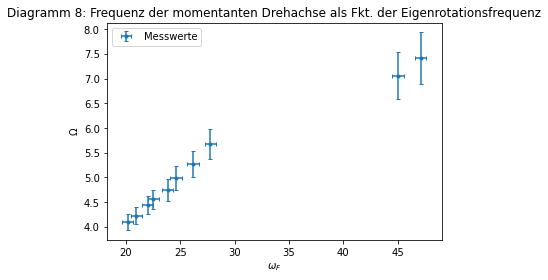

In [20]:
plt.errorbar(omega_f, omega_mom ,linestyle="None", marker = ".", yerr = omega_mom_err, xerr = omega_f_err,  capsize = 2, label="Messwerte")
plt.legend()
plt.title("Diagramm 8: Frequenz der momentanten Drehachse als Fkt. der Eigenrotationsfrequenz")
plt.xlabel("$\\omega_F$")
plt.ylabel("$\\Omega$")

In [21]:
popt, pcov = curve_fit(linear, omega_f, omega_mom, sigma = omega_mom_err)

slope = popt
slope_err = np.sqrt(pcov[0])

print("Steigung: ", slope)
print("Fehler Steigung: ", slope_err)

Steigung:  [0.1953701]
Fehler Steigung:  [0.00533666]


Text(0, 0.5, '$\\Omega$')

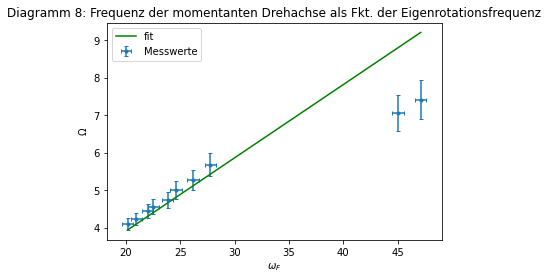

In [22]:
plt.errorbar(omega_f, omega_mom ,linestyle="None", marker = ".", yerr = omega_mom_err, xerr = omega_f_err,  capsize = 2, label="Messwerte")
plt.plot(omega_f, linear(omega_f, slope), color="green", label="fit")
plt.legend()
plt.title("Diagramm 8: Frequenz der momentanten Drehachse als Fkt. der Eigenrotationsfrequenz")
plt.xlabel("$\\omega_F$")
plt.ylabel("$\\Omega$")

In [23]:
# Wir bestimmen nun das Trägheitsmoment in x-Richtung aus der Steigung:
I_x = I_z_mean / (1-slope)
I_x_err = np.sqrt( (I_z_mean_err/(1-slope))**2 + (I_z_mean * slope_err / ((1-slope)**2))**2 )

print("Trägheitsmoment I_x: ", I_x, "kgm^2")
print("Fehler I_x: ", I_x_err, "kgm^2")

Trägheitsmoment I_x:  [0.02021931] kgm^2
Fehler I_x:  [0.00624713] kgm^2


Ergebnis: <br>
$I_x = 0.020 \pm 0.006 kgm^2$

## 5) Bestimmung von $I_x$ über die Nutationsfrequenz

Text(0, 0.5, '$\\omega_N$')

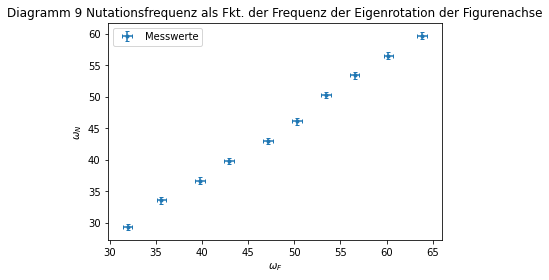

In [24]:
# Wir tragen unsere Werte für die Eigenrotationfrequenz und die Nutationsfrequenz in arrays ein
omega_f_nu = 2 * np.pi * np.array([610 , 575 , 540 , 510 , 480 , 450 , 410 , 380 , 340 , 305]) / 60
omega_n_nu = 2 * np.pi * np.array([570 , 540 , 510 , 480 , 440 , 410 , 380 , 350 , 320 , 280]) / 60
omega_f_nu_err = 2 * np.pi * np.ones(10)*5/60
omega_n_nu_err = 2 * np.pi * np.ones(10)*5/60

# Wir plotten unsere Messwerte
plt.errorbar(omega_f_nu, omega_n_nu ,linestyle="None", marker = ".", yerr = omega_n_nu_err, xerr = omega_f_nu_err,  capsize = 2, label="Messwerte")
plt.legend()
plt.title("Diagramm 9 Nutationsfrequenz als Fkt. der Frequenz der Eigenrotation der Figurenachse")
plt.xlabel("$\\omega_F$")
plt.ylabel("$\\omega_N$")

In [25]:
# Nun führen wir erneut einen fit durch um die Steigung zu bestimmen. Nach Gleichung (2) entspricht die Steigung genau I_z / I_x

popt_nu , pcov_nu = curve_fit(linear, omega_f_nu, omega_n_nu, sigma = omega_n_nu_err)

slope_nu = popt_nu
slope_nu_err = np.sqrt(pcov_nu[0])

print("Steigung: ",slope_nu)
print("Fehler Steigung: ",slope_nu_err)

Steigung:  [0.93146777]
Fehler Steigung:  [0.0037375]


In [26]:
# Wir bestimmen nun I_x aus Gleichung (2)
I_x_nu = I_z_mean / slope_nu
I_x_nu_err = np.sqrt((I_z_mean_err / slope_nu)**2 + (I_z_mean * slope_nu_err / (slope_nu)**2)**2)

print("Trägheitsmoment I_x: " , I_x_nu, "[kgm^2]")
print("Fehler Trägheitsmoment I_x: " , I_x_nu_err, "[kgm^2]")

Trägheitsmoment I_x:  [0.01746605] [kgm^2]
Fehler Trägheitsmoment I_x:  [0.00539567] [kgm^2]


Unser Ergebnis lautet also: <br>
$I_x = 0.0175 \pm 0.005 kgm^2$

In [27]:
# Wir berechnen die Abweichung zwischen unseren Werten für I_x:
sigma_i_x = (I_x - I_x_nu)/(np.sqrt(I_x_err**2 + I_x_nu_err**2))
print("Abweichung I_x: ", sigma_i_x)

Abweichung I_x:  [0.33353898]
